In [130]:
import pandas as pd
from psycopg2 import connect
import numpy as np
import matplotlib.pyplot as plt


In [112]:
class Configuration:
    PG_HOST = 'business-intelligent-db.cw1neqwhyrda.eu-central-1.rds.amazonaws.com'
    PG_USER = 'postgres'
    PG_PWD = '52eXzbKbqmY2x45f'

In [137]:
columns = ['year', 'month', 'day_of_month', 'day_of_week', 'dep_time', 'crs_dep_time', 'arr_time', 'crs_arr_time', 'unique_carrier', 'flight_num', 'tail_num',
           'actual_elapsed_time', 'crs_elapsed_time', 'air_time', 'arr_delay', 'dep_delay', 'origin', 'dest', 'distance', 'taxi_in', 'taxi_out','cancelled',
           'cancellation_code', 'diverted', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

df_88 = pd.read_csv("./dataset/1988.csv", 
                    dtype={'dep_time': str,
                            'crs_dep_time': str,
                            'arr_time': str,
                            'crs_arr_time': str}, 
                    skiprows=1,
                    names=columns)

In [4]:
def convert_to_real_time(t):
    t = str(t)
    _len = len(t)
    if _len == 3:
        return f'0{t[:1]}:{t[1:3]}:00'
    elif _len == 4:
        if t == '2400':
            t = '0000'
        return f'{t[:2]}:{t[2:4]}:00'

In [ ]:
def transform_data(data):
    # copy
    df = data.copy()
   
    # transform
    df['dep_time'] = df["dep_time"].apply(convert_to_real_time)
    df['crs_dep_time'] = df['crs_dep_time'].apply(convert_to_real_time)
    df['arr_time'] = df['arr_time'].apply(convert_to_real_time)
    df['crs_arr_time'] = df['crs_arr_time'].apply(convert_to_real_time)

    return df

In [105]:
def convert_to_time(data):
    df = data.copy()
    df['dep_time'] = df[["year", "month", "day_of_month", "dep_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
    df['crs_dep_time'] = df[["year", "month", "day_of_month", "crs_dep_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
    df['arr_time'] = df[["year", "month", "day_of_month", "arr_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
    df['crs_arr_time'] = df[["year", "month", "day_of_month", "crs_arr_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
    return df

In [138]:
df_88.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1988,1,9,6,1348,1331,1458,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1988,1,10,7,1334,1331,1443,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1988,1,11,1,1446,1331,1553,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1988,1,12,2,1334,1331,1438,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1988,1,13,3,1341,1331,1503,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [143]:
df_88[(df_88['arr_time'] < '100')]

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1264,1988,1,14,4,2259,2300,10,5,PS,1436,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1268,1988,1,20,3,2300,2300,1,10,PS,1436,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4653,1988,1,20,3,2154,2155,10,20,PS,1630,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5229,1988,1,29,5,2310,2250,10,2344,PS,1671,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7311,1988,1,1,5,2300,2300,10,10,PS,1749,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189855,1988,12,26,1,1916,1855,1,2336,CO,1086,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5191745,1988,12,28,3,2036,2035,1,2312,CO,1207,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5193011,1988,12,18,7,2125,2055,1,2351,CO,1236,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5193014,1988,12,21,3,2110,2055,10,2351,CO,1236,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Missing Data Check

In [116]:

percentage_missing = df_88.isnull().sum() * 100 / len(df)
tbl_percentage_missing = pd.DataFrame({'percentage_missing': percentage_missing})
tbl_percentage_missing

,percentage_missing
year,0.000000
month,0.000000
day_of_month,0.000000
day_of_week,0.000000
dep_time,0.995061
crs_dep_time,0.000000
arr_time,1.281421
crs_arr_time,0.000000
unique_carrier,0.000000
flight_num,0.000000


# Eliminate Missing values

In [117]:
df_87 = df_88.replace('NaN', np.nan)

# drop columns with ALL NaN
df_drop_col = df_87.dropna(axis=1, thresh=1)


# drop rows with ANY NaN
df_drop_row = df_drop_col.dropna(axis=0, thresh=df_drop_col.shape[1]).reset_index(drop=True)
df_drop_row.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,actual_elapsed_time,crs_elapsed_time,arr_delay,dep_delay,origin,dest,distance,cancelled,diverted
0,1988,1,9,6,1348,1331,1458,1435,PI,942,70.0,64,23.0,17.0,SYR,BWI,273.0,0,0
1,1988,1,10,7,1334,1331,1443,1435,PI,942,69.0,64,8.0,3.0,SYR,BWI,273.0,0,0
2,1988,1,11,1,1446,1331,1553,1435,PI,942,67.0,64,78.0,75.0,SYR,BWI,273.0,0,0
3,1988,1,12,2,1334,1331,1438,1435,PI,942,64.0,64,3.0,3.0,SYR,BWI,273.0,0,0
4,1988,1,13,3,1341,1331,1503,1435,PI,942,82.0,64,28.0,10.0,SYR,BWI,273.0,0,0


In [118]:
df_transform = transform_data(df_drop_row)
df_transform.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,actual_elapsed_time,crs_elapsed_time,arr_delay,dep_delay,origin,dest,distance,cancelled,diverted
0,1988,1,9,6,13:48:00,13:31:00,14:58:00,14:35:00,PI,942,70.0,64,23.0,17.0,SYR,BWI,273.0,0,0
1,1988,1,10,7,13:34:00,13:31:00,14:43:00,14:35:00,PI,942,69.0,64,8.0,3.0,SYR,BWI,273.0,0,0
2,1988,1,11,1,14:46:00,13:31:00,15:53:00,14:35:00,PI,942,67.0,64,78.0,75.0,SYR,BWI,273.0,0,0
3,1988,1,12,2,13:34:00,13:31:00,14:38:00,14:35:00,PI,942,64.0,64,3.0,3.0,SYR,BWI,273.0,0,0
4,1988,1,13,3,13:41:00,13:31:00,15:03:00,14:35:00,PI,942,82.0,64,28.0,10.0,SYR,BWI,273.0,0,0


In [119]:
df_transform = df_transform.dropna(axis=0, thresh=df_transform.shape[1]).reset_index(drop=True)
df_drop_row.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,actual_elapsed_time,crs_elapsed_time,arr_delay,dep_delay,origin,dest,distance,cancelled,diverted
0,1988,1,9,6,1348,1331,1458,1435,PI,942,70.0,64,23.0,17.0,SYR,BWI,273.0,0,0
1,1988,1,10,7,1334,1331,1443,1435,PI,942,69.0,64,8.0,3.0,SYR,BWI,273.0,0,0
2,1988,1,11,1,1446,1331,1553,1435,PI,942,67.0,64,78.0,75.0,SYR,BWI,273.0,0,0
3,1988,1,12,2,1334,1331,1438,1435,PI,942,64.0,64,3.0,3.0,SYR,BWI,273.0,0,0
4,1988,1,13,3,1341,1331,1503,1435,PI,942,82.0,64,28.0,10.0,SYR,BWI,273.0,0,0


In [120]:
null_idx = pd.isna(df_drop_row["arr_time"])
df_drop_row[null_idx]

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,actual_elapsed_time,crs_elapsed_time,arr_delay,dep_delay,origin,dest,distance,cancelled,diverted


In [83]:
df_transform.iloc[540:650][(df_transform['month']==10) & (df_transform['day_of_month']==4)]

/var/folders/hz/nbzpvs9s0qvct8z75zdsyjsm0000gn/T/ipykernel_10683/3175645348.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_transform.iloc[540:650][(df_transform['month']==10) & (df_transform['day_of_month']==4)]


,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,actual_elapsed_time,crs_elapsed_time,arr_delay,dep_delay,origin,dest,distance,cancelled,diverted
551,1987,10,4,7,21:40:00,20:45:00,22:52:00,21:59:00,PS,1483,72.0,74,53.0,55.0,SAN,OAK,446.0,0,0
561,1987,10,4,7,19:55:00,19:45:00,21:17:00,21:01:00,PS,1484,82.0,76,16.0,10.0,SFO,SAN,447.0,0,0
584,1987,10,4,7,16:50:00,16:48:00,18:12:00,18:06:00,PS,1485,82.0,78,6.0,2.0,SAN,OAK,446.0,0,0
608,1987,10,4,7,21:01:00,20:16:00,22:24:00,21:32:00,PS,1486,83.0,76,52.0,45.0,OAK,SAN,446.0,0,0
635,1987,10,4,7,08:16:00,08:15:00,09:31:00,09:28:00,PS,1489,75.0,73,3.0,1.0,SNA,OAK,371.0,0,0


In [96]:
# 
print("Number of sample records: ", len(df_87))
print("Number of initial columns: ", len(df_87.columns))
print("Number of records after eliminating NaN values: ", len(df_transform))
print("Number of columns after eliminating NaN values: ", len(df_transform.columns))

Number of sample records:  5202096
Number of initial columns:  29
Number of records after eliminating NaN values:  5126498
Number of columns after eliminating NaN values:  19


In [72]:
df_drop_row.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,actual_elapsed_time,crs_elapsed_time,arr_delay,dep_delay,origin,dest,distance,cancelled,diverted
0,1987,10,14,3,741,730,912,849,PS,1451,91.0,79,23.0,11.0,SAN,SFO,447.0,0,0
1,1987,10,15,4,729,730,903,849,PS,1451,94.0,79,14.0,-1.0,SAN,SFO,447.0,0,0
2,1987,10,17,6,741,730,918,849,PS,1451,97.0,79,29.0,11.0,SAN,SFO,447.0,0,0
3,1987,10,18,7,729,730,847,849,PS,1451,78.0,79,-2.0,-1.0,SAN,SFO,447.0,0,0
4,1987,10,19,1,749,730,922,849,PS,1451,93.0,79,33.0,19.0,SAN,SFO,447.0,0,0


In [122]:
df_transform = convert_to_time(df_transform)
df_transform.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,actual_elapsed_time,crs_elapsed_time,arr_delay,dep_delay,origin,dest,distance,cancelled,diverted
0,1988,1,9,6,1988-01-09 13:48:00,1988-01-09 13:31:00,1988-01-09 14:58:00,1988-01-09 14:35:00,PI,942,70.0,64,23.0,17.0,SYR,BWI,273.0,0,0
1,1988,1,10,7,1988-01-10 13:34:00,1988-01-10 13:31:00,1988-01-10 14:43:00,1988-01-10 14:35:00,PI,942,69.0,64,8.0,3.0,SYR,BWI,273.0,0,0
2,1988,1,11,1,1988-01-11 14:46:00,1988-01-11 13:31:00,1988-01-11 15:53:00,1988-01-11 14:35:00,PI,942,67.0,64,78.0,75.0,SYR,BWI,273.0,0,0
3,1988,1,12,2,1988-01-12 13:34:00,1988-01-12 13:31:00,1988-01-12 14:38:00,1988-01-12 14:35:00,PI,942,64.0,64,3.0,3.0,SYR,BWI,273.0,0,0
4,1988,1,13,3,1988-01-13 13:41:00,1988-01-13 13:31:00,1988-01-13 15:03:00,1988-01-13 14:35:00,PI,942,82.0,64,28.0,10.0,SYR,BWI,273.0,0,0


In [123]:
df_transform.query('arr_time.str.contains("None")', engine='python')


,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,actual_elapsed_time,crs_elapsed_time,arr_delay,dep_delay,origin,dest,distance,cancelled,diverted


In [124]:
df_transform.to_csv("./result/1988.csv", index=False, header=True)

In [50]:
df_transform.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'dep_time',
       'crs_dep_time', 'arr_time', 'crs_arr_time', 'unique_carrier',
       'flight_num', 'actual_elapsed_time', 'crs_elapsed_time', 'arr_delay',
       'dep_delay', 'origin', 'dest', 'distance', 'cancelled', 'diverted'],
      dtype='object')

### Recheck missing values

In [136]:
percentage_missing = df_transform.isnull().sum() * 100 / len(df_transform)
tbl_percentage_missing = pd.DataFrame({'percentage_missing': percentage_missing})
tbl_percentage_missing

,percentage_missing
year,0.0
month,0.0
day_of_month,0.0
day_of_week,0.0
dep_time,0.0
crs_dep_time,0.0
arr_time,0.0
crs_arr_time,0.0
unique_carrier,0.0
flight_num,0.0


<Axes: xlabel='month'>

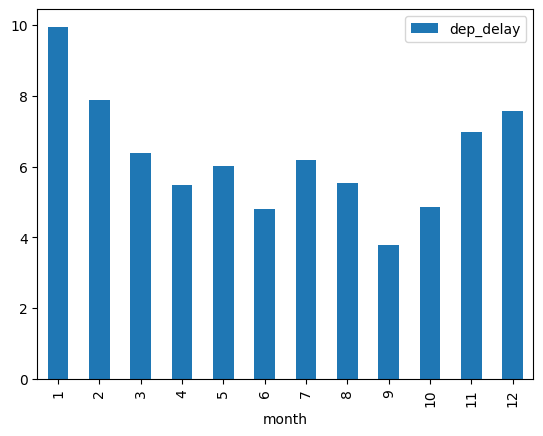

In [131]:
grouped = df_transform[['dep_delay', 'month']].groupby('month').mean()
grouped.plot(kind='bar')

<Axes: xlabel='unique_carrier'>

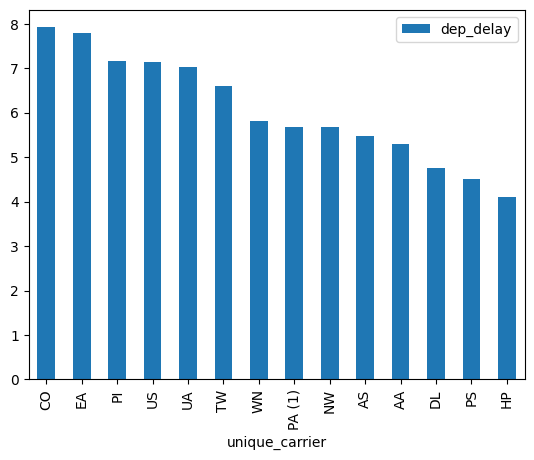

In [135]:
grouped1 = df_transform[['dep_delay', 'unique_carrier']].groupby('unique_carrier').filter(lambda x: len(x)>10)
grouped2 = grouped1.groupby('unique_carrier').mean()
carrier = grouped2.sort_values(['dep_delay'], ascending=False)

# display top 15 destination carriers by delay (from ORD)
carrier[:15].plot(kind='bar')

In [ ]:
df['dep_time'] = df["dep_time"].apply(convert_to_real_time)
df['crs_dep_time'] = df['crs_dep_time'].apply(convert_to_real_time)
df['arr_time'] = df['arr_time'].apply(convert_to_real_time)
df['crs_arr_time'] = df['crs_arr_time'].apply(convert_to_real_time)


In [118]:
df['dep_time'] = df[["year", "month", "day_of_month", "dep_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
df['crs_dep_time'] = df[["year", "month", "day_of_month", "crs_dep_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
df['arr_time'] = df[["year", "month", "day_of_month", "arr_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
df['crs_arr_time'] = df[["year", "month", "day_of_month", "crs_arr_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)

In [113]:
import psycopg2
import os


def copy_from_file(conn, df, table):
    # save the dataframe on disk as a csv file, load
    # the csv file and use copy_from() to copy it to the table
    tmp_df = "./result/1989.csv"
    # df.to_csv(tmp_df, header=True, index=False)
    f = open(tmp_df, 'r')
    cursor = conn.cursor()
    try:
        cursor.copy_from(f, table, sep=',')
        conn.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        # os.remove(tmp_df)
        print("Error: %s" %error)
        conn.rollback()
        conn.close()
        return 1
    print("copy_from_file() done")
    cursor.close()
    # os.remove(tmp_df)

In [114]:
# connect to our postgres DB
conn = connect(host=Configuration.PG_HOST,
                user=Configuration.PG_USER,
                password=Configuration.PG_PWD,
                database="airline",
                port=5432)
copy_from_file(conn, df_transform, 'flight')

Error: invalid input syntax for type integer: "year"
CONTEXT:  COPY flight, line 1, column year: "year"



1

In [126]:
df_87.iloc[51:53]

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
51,1987,10,11,7,1505,1505,1602,1608,PS,1453,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
52,1987,10,12,1,NaN,1505,NaN,1608,PS,1453,...,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN


In [117]:
df.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,test
0,1987,10,14,3,07:41:00,07:30:00,09:12:00,08:49:00,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1987-10-14 07:41:00
1,1987,10,15,4,07:29:00,07:30:00,09:03:00,08:49:00,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1987-10-15 07:29:00
2,1987,10,17,6,07:41:00,07:30:00,09:18:00,08:49:00,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1987-10-17 07:41:00
3,1987,10,18,7,07:29:00,07:30:00,08:47:00,08:49:00,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1987-10-18 07:29:00
4,1987,10,19,1,07:49:00,07:30:00,09:22:00,08:49:00,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1987-10-19 07:49:00


In [116]:
import io, csv
sio = io.StringIO()
writer = csv.writer(sio)
writer.writerows(df.values)
sio.seek(0)

with conn.cursor() as c:
    c.copy_from(
        file=sio,
        table="flight",
        columns=columns,
        sep=","
    )
    conn.commit()

BadCopyFileFormat: extra data after last expected column
CONTEXT:  COPY flight, line 1: "1987,10,14,3,07:41:00,07:30:00,09:12:00,08:49:00,PS,1451,nan,91.0,79,nan,23.0,11.0,SAN,SFO,447.0,nan..."


In [89]:
df[['dep_time', 'crs_dep_time', 'dep_delay']].head()

,dep_time,crs_dep_time,dep_delay
0,07:41:00,07:30:00,11.0
1,07:29:00,07:30:00,-1.0
2,07:41:00,07:30:00,11.0
3,07:29:00,07:30:00,-1.0
4,07:49:00,07:30:00,19.0


In [87]:
df.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1987,10,14,3,07:41:00,07:30:00,09:12:00,08:49:00,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1987,10,15,4,07:29:00,07:30:00,09:03:00,08:49:00,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1987,10,17,6,07:41:00,07:30:00,09:18:00,08:49:00,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1987,10,18,7,07:29:00,07:30:00,08:47:00,08:49:00,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1987,10,19,1,07:49:00,07:30:00,09:22:00,08:49:00,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Eliminating Samples or Features with Missing Values

In [25]:
# Drop columns with ALL NaN
df_96 = df_96.dropna(axis=1, how='all')
# Drop rows with ANY NaN
df_96 = df_96.dropna(axis=0, thresh=df_96.shape[1])

In [28]:
df_96.describe()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,5209326.0,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5209326.0,5209326.0
mean,1996.0,6.555528e+00,1.576909e+01,3.939960e+00,1.355100e+03,1.322840e+03,1.500954e+03,1.477667e+03,9.958840e+02,1.195761e+02,1.197676e+02,9.971348e+01,9.673284e+00,9.929403e+00,7.136812e+02,5.631598e+00,1.423271e+01,0.0,0.0
std,0.0,3.427297e+00,8.798858e+00,1.995568e+00,4.762745e+02,4.941378e+02,4.959666e+02,5.117228e+02,6.586318e+02,6.711781e+01,6.622149e+01,6.363628e+01,3.028406e+01,2.864965e+01,5.388000e+02,4.107028e+00,9.351258e+00,0.0,0.0
min,1996.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-2.340000e+02,1.500000e+01,1.000000e+00,-1.426000e+03,-6.800000e+01,1.100000e+01,1.000000e+00,1.000000e+00,0.0,0.0
25%,1996.0,4.000000e+00,8.000000e+00,2.000000e+00,9.380000e+02,9.240000e+02,1.121000e+03,1.110000e+03,4.470000e+02,7.000000e+01,7.000000e+01,5.300000e+01,-5.000000e+00,-1.000000e+00,3.250000e+02,3.000000e+00,9.000000e+00,0.0,0.0
50%,1996.0,7.000000e+00,1.600000e+01,4.000000e+00,1.340000e+03,1.325000e+03,1.528000e+03,1.520000e+03,8.820000e+02,1.020000e+02,1.010000e+02,8.200000e+01,2.000000e+00,0.000000e+00,5.590000e+02,5.000000e+00,1.200000e+01,0.0,0.0
75%,1996.0,1.000000e+01,2.300000e+01,6.000000e+00,1.740000e+03,1.727000e+03,1.921000e+03,1.912000e+03,1.516000e+03,1.510000e+02,1.510000e+02,1.290000e+02,1.300000e+01,9.000000e+00,9.500000e+02,7.000000e+00,1.700000e+01,0.0,0.0
max,1996.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,3.369000e+03,8.980000e+02,1.592000e+03,1.193000e+03,1.416000e+03,1.438000e+03,4.502000e+03,5.800000e+02,4.810000e+02,0.0,0.0


In [21]:
# check the number of null data
df_96.isnull().sum() * 100/len(df_96)

Year                 0.000000
Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
DepTime              2.401652
CRSDepTime           0.000000
ArrTime              2.665498
CRSArrTime           0.000000
UniqueCarrier        0.000000
FlightNum            0.000000
TailNum              0.000000
ActualElapsedTime    2.665498
CRSElapsedTime       0.086809
AirTime              2.665498
ArrDelay             2.665498
DepDelay             2.401652
Origin               0.000000
Dest                 0.000000
Distance             0.000000
TaxiIn               0.000000
TaxiOut              0.000000
Cancelled            0.000000
Diverted             0.000000
dtype: float64

In [16]:
# gives some infomations on columns types and number of null values
df_info=pd.DataFrame(df_96.dtypes).T.rename(index={0:'column type'})
df_info=df_info.append(pd.DataFrame(df_96.isnull().sum()).T.rename(index={0:'null values:'}))
df_info=df_info.append(pd.DataFrame(df_96.isnull().sum()/df_96.shape[0]*100).T.rename(index={0:'null values (%)'}))
df_info

/var/folders/g_/k80jk1510nv2x3zggx95y3p40000gn/T/ipykernel_6930/1814321294.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_info=df_info.append(pd.DataFrame(df_96.isnull().sum()).T.rename(index={0:'null values:'}))
/var/folders/g_/k80jk1510nv2x3zggx95y3p40000gn/T/ipykernel_6930/1814321294.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_info=df_info.append(pd.DataFrame(df_96.isnull().sum()/df_96.shape[0]*100).T.rename(index={0:'null values (%)'}))


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
column type,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,...,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64
null values:,0,0,0,0,128536,0,142657,0,0,0,...,0,0,0,5351983,0,5351983,5351983,5351983,5351983,5351983
null values (%),0.0,0.0,0.0,0.0,2.401652,0.0,2.665498,0.0,0.0,0.0,...,0.0,0.0,0.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
